### 1. Augmented Dickey-Fuller (ADF) test 

### 2.  Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test 

### 3. Seasonal Autoregressive Integrated Moving Average (SARIMA) process

### 4. auto_arima from pmdarima package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import os
#os.chdir("C:\\Users\\Aram\\Documents\\Work\\AUA\\Time Series Forecasting\\Slides\\Lecture 8\\")

### Air Passengers data

In [2]:
from datetime import datetime

Passengers = pd.read_csv(r'AirPassengers.csv') # Air Passengers
Passengers.index = pd.to_datetime(Passengers['index'],format="%Y %b") 
del Passengers["index"]
Passengers.head()

,value
index,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


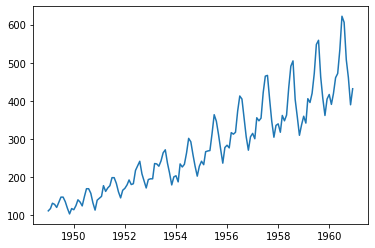

In [3]:
plt.plot(Passengers.index,Passengers.value)         # plot series
plt.show();

### 1. ADF



The Augmented Dickey-Fuller test can be used to test for a unit root in a
univariate process in the presence of serial correlation.

#### DF for AR(1)

Consider the simple AR(1) case, $ x_t =\phi x_{t-1}+w_t$. When $\phi = 1$ there is a unit root, when $|\phi| < 1$ we have causality (stationarity). An obvious test statistic would be to consider $(\hat{\phi} -1)$, to test it we can modify the equation substracting $x_{t-1}$ from both sides and regressing $\nabla x_t$ on $x_{t-1}$ (the derivation of test statistic is more complicated but it follows the logic described, check TS, pp. 250-252).


$$ \nabla x_t = (\phi-1)x_{t-1}+w_t=\gamma x_{t-1}+w_t $$

$$\pmb{H_0}: \gamma = 0 \quad \quad\pmb{H_1}: \gamma < 0 $$

The null hypothesis of the Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root.

#### ADF for AR(2)

Now consider ADF for AR(2) model. Note that we can represent AR(2) model in the following form

$$x_t = \phi_1x_{t-1}+\phi_2x_{t-2}+w_t + \phi_2x_{t-1}-\phi_2x_{t-1}= (\phi_1+\phi_2)x_{t-1}- \phi_2(x_{t-1}-x_{t-2})+w_t$$

Substracting $x_{t-1}$ from both sides of equation, we get

$$x_t-x_{t-1} = (\phi_1+\phi_2-1)x_{t-1}- \phi_2(x_{t-1}-x_{t-2})+w_t \Rightarrow$$


$$\nabla x_t = \gamma x_{t-1}- \phi_2\nabla x_{t-1}+w_t \quad where \quad \gamma = \phi_1+\phi_2-1 $$


$$\pmb{H_0}: \gamma = 0 \quad \quad\pmb{H_1}: \gamma < 0 $$

In the case of AR(2), we regress $\nabla x_t$ on $x_{t-1}$ and $\nabla x_{t-1}$. The null and alternative hypothesis are the same. Here, $\gamma=0$ is equivalent to $\phi(z) = 0$, when $z=1$, i.e. $z=1$ is the root of polynomial (unit root).  

#### ADF for AR(p)

For the general case to accommodate AR( $p$ ) models, $x_{t}=\sum_{j=1}^{p} \phi_{j} x_{t-j}+w_{t},$ subtract $x_{t-1}$ from both sides of AR(p) to obtain

$$
\nabla x_{t}=\gamma x_{t-1}+\sum_{j=1}^{p-1} \psi_{j} \nabla x_{t-j}+w_{t}
$$

where $\gamma=\sum_{j=1}^{p} \phi_{j}-1$ and $\psi_{j}=-\sum_{i=j}^{p} \phi_{i}$ for $j=2, \ldots, p .$ To test the hypothesis that the process has a unit root at 1 (i.e., the AR polynoimial $\phi(z)=0$ when $z=1$ ), we can test $H_{0}: \gamma=0$ by estimating $\gamma$ in the regression of $\nabla x_{t}$ on $x_{t-1}, \nabla x_{t-1}, \ldots, \nabla x_{t-p+1},$ and forming a Wald test based on $t_{\gamma}=\hat{\gamma} / \operatorname{se}(\hat{\gamma}) .$ This test leads to the so-called augmented Dickey-Fuller test $(\mathrm{ADF})$ While the calculations for obtaining the asymptotic null distribution change, the basic ideas and machinery remain the same as in the simple case. The choice of $p$ is crucial. For $\operatorname{ARMA}(p, q)$ models, the ADF test can be used by assuming $p$ is large enough to capture the essential correlation structure.


The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root.


In [4]:
from statsmodels.tsa.stattools import adfuller

The **adfuller** command choses maximum number of lags to consider following the rule 12*(nobs/100)^{1/4}. Among these lags it choses the lag of the process by one of the criteries (AIC, BIC, t-statistic). Default is AIC. The idea is the following, it increases number of lags one by one and checks the significanse of the last lag included or minimizes the AIC's of the models.

For more details check Econometrics by Greene, link is below (p 637):

https://spu.fem.uniag.sk/cvicenia/ksov/obtulovic/Mana%C5%BE.%20%C5%A1tatistika%20a%20ekonometria/EconometricsGREENE.pdf

Documentation of adfuller command:

https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html

In [5]:
X = Passengers.values
result =adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


We can see that in this case lag is equal to 13.

In [6]:
X = Passengers.values
result =adfuller(X, maxlag = 13)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


#### P-value is greater than, let's say $\alpha = 0.05$, threshold, hence we cannot reject the null hypothesis and conclude that time series possess unit root. 

### Modifications of ADF

#### We can include 1. constant, 2. constant and trend, 3. constant, trend, and quadratic trend into regression. 

#### As a result, alternativie hypothesis would be 1. stationary and $\mu$ is different from zero, 2. stationary, $\mu$ is different from zero, and there is a trend, 3. stationary, $\mu$ is different from zero, there is a trend and it is quadratic.

By defauls adfuller command includes constant, since in practice the mean of the series is rarely equal to zero. The rest of the options are 

“ct” : constant and trend.

“ctt” : constant, and linear and quadratic trend.

“nc” : no constant, no trend.

### To check how modifications work let's generate the ARMA(2,2) series

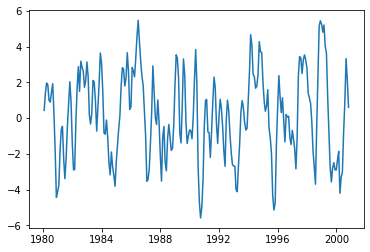

In [7]:
from statsmodels.tsa.arima_process import arma_generate_sample
arparams = np.array([.75, -.25])  # AR parameter values
maparams = np.array([.65, .35])   # MA parameter values

arparams = np.r_[1, -arparams]    # add zero-lag and negate
maparams = np.r_[1, maparams]     # add zero-lag
nobs = 250                        # number of observations
y = arma_generate_sample(arparams, maparams, nobs)                 # generate series
dates = pd.date_range('1980-1-1', freq="M", periods=nobs)          # generate dates
plt.plot(dates,y);

In [8]:
X = y
result =adfuller(X, regression = None)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.813368
p-value: 0.000000
Critical Values:
	1%: -2.575
	5%: -1.942
	10%: -1.616


#### P-value is smaller than, let's say $\alpha = 0.05$, threshold, hence we reject the null hypothesis and conclude that time series is stationary and $\mu$ is different from zero. 

For the next example we change the mean of the series by adding 5 to each observation.

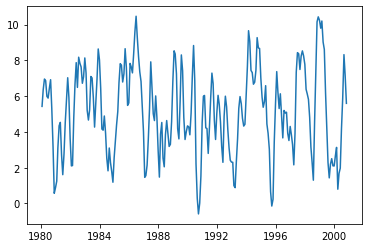

In [9]:
y = y +5
plt.plot(dates,y);

In [10]:
X = y
result =adfuller(X, regression = "c")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.817361
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


#### P-value is smaller than, let's say $\alpha = 0.05$, threshold, hence we reject the null hypothesis and conclude that time series is stationary. 

In this case, you can check that when we exclude the constant test suggests that it is not stationary. 

For the next example we add the trend.

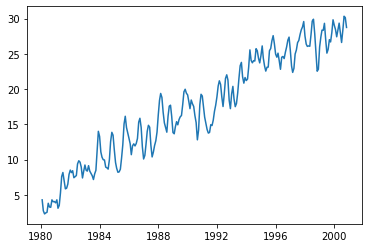

In [ ]:
z = np.arange(0,25,0.1)
y = y + z
plt.plot(dates,y);

In [ ]:
X = y
result =adfuller(X, regression = "ct")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.851844
p-value: 0.000000
Critical Values:
	1%: -3.996
	5%: -3.428
	10%: -3.138


#### P-value is smaller than, let's say $\alpha = 0.05$, threshold, hence we reject the null hypothesis and conclude that time series is stationary, $\mu$ is different from zero, and there is a trend,

In this case, you can check that when we exclude the trend, constant or both test suggests that it is not stationary. 



### 2. KPSS

### Null: hypothesis that series is level or trend stationary
### Alternative: unit root

In [11]:
from pandas import read_csv
from statsmodels.tsa.stattools import kpss
X = Passengers.values
result =kpss(X)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
result

(1.0521750110135095,
 0.01,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [12]:
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('number of lags: %f' % result[2])

print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))

KPSS Statistic: 1.651312
p-value: 0.010000
number of lags: 8.000000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


### ARIMA model for Air Passengers data

In [14]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 40.2 MB/s eta 0:00:00


In [15]:
import pmdarima as pm

model = pm.auto_arima(Passengers.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1412.973, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2057.847, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1410.569, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1417.450, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1411.319, Time=0.29 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1411.135, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1413.093, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1408.249, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1409.748, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1413.639, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1408.287, T

## 3. How to Configure SARIMA

Configuring a SARIMA requires selecting hyperparameters for both the trend and seasonal elements of the series.

Trend Elements
There are three trend elements that require configuration.

They are the same as the ARIMA model; specifically:

p: Trend autoregression order.
d: Trend difference order.
q: Trend moving average order.
Seasonal Elements
There are four seasonal elements that are not part of ARIMA that must be configured; they are:

P: Seasonal autoregressive order.
D: Seasonal difference order.
Q: Seasonal moving average order.
m: The number of time steps for a single seasonal period.

### Air Passengers data (cont.)

In [ ]:
import pmdarima as pm

model = pm.auto_arima(Passengers.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=1309.141, Time=0.84 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1790.368, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2057.847, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1409.748, Time=0.15 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=1158.762, Time=1.16 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=1157.611, Time=0.74 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=1158.451, Time=1.77 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=2.40 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1360.856, Time=1.04 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=1159.219, Time=0.99 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,0,2)(1,0,0)[12] intercept   : AIC=i

### Jonson & Jonson data

In [ ]:
jonson = pd.read_csv(r'jj.csv') # Jonson & Jonson
jonson.head()

,index,value
0,1960 Q1,0.71
1,1960 Q2,0.63
2,1960 Q3,0.85
3,1960 Q4,0.44
4,1961 Q1,0.61


In [ ]:
import pmdarima as pm

model = pm.auto_arima(jonson.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=True,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,True,1)(0,0,1)[12] intercept   : AIC=227.003, Time=0.27 sec
 ARIMA(0,True,0)(0,0,0)[12] intercept   : AIC=297.285, Time=0.00 sec
 ARIMA(1,True,0)(1,0,0)[12] intercept   : AIC=213.961, Time=0.37 sec
 ARIMA(0,True,1)(0,0,1)[12] intercept   : AIC=239.009, Time=0.32 sec
 ARIMA(0,True,0)(0,0,0)[12]             : AIC=295.995, Time=0.01 sec
 ARIMA(1,True,0)(0,0,0)[12] intercept   : AIC=264.953, Time=0.05 sec
 ARIMA(1,True,0)(2,0,0)[12] intercept   : AIC=212.051, Time=0.57 sec
 ARIMA(1,True,0)(2,0,1)[12] intercept   : AIC=212.585, Time=1.52 sec
 ARIMA(1,True,0)(1,0,1)[12] intercept   : AIC=213.532, Time=0.44 sec
 ARIMA(0,True,0)(2,0,0)[12] intercept   : AIC=274.081, Time=0.49 sec
 ARIMA(2,True,0)(2,0,0)[12] intercept   : AIC=213.500, Time=1.29 sec
 ARIMA(1,True,1)(2,0,0)[12] intercept   : AIC=208.040, Time=1.41 sec
 ARIMA(1,True,1)(1,0,0)[12] intercept   : AIC=208.630, Time=0.34 sec
 ARIMA(1,True,1)(2,0,1)[12] intercept   : AIC=208.143, Time=

### 4. auto_arima from pmdarima package

In [ ]:
help(pm.auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].
